In [1]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure
from skimage import io

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def load_data_img_as_array(path: Path) -> np.ndarray:
    img = io.imread(path, as_gray=False)
    img = np.clip(img, a_min=None, a_max=pow(2, 14))
    img = exposure.rescale_intensity(
        img, in_range='uint14', out_range=(0.0, 1.0))
    return img

In [3]:
hr = load_data_img_as_array('../data/proba-v_registered/train/NIR/imgset0644/HR002.png')
lr = load_data_img_as_array('../data/proba-v_registered/train/NIR/imgset0644/LR002.png')

In [7]:
hr_eq = exposure.equalize_hist(hr)
lr_eq = exposure.equalize_hist(lr)
hr_adapt_eq = exposure.equalize_adapthist(hr)
lr_adapt_eq = exposure.equalize_adapthist(lr)
lr_adj_hr = exposure.match_histograms(lr, hr)
hr_adj_lr = exposure.match_histograms(hr, lr)

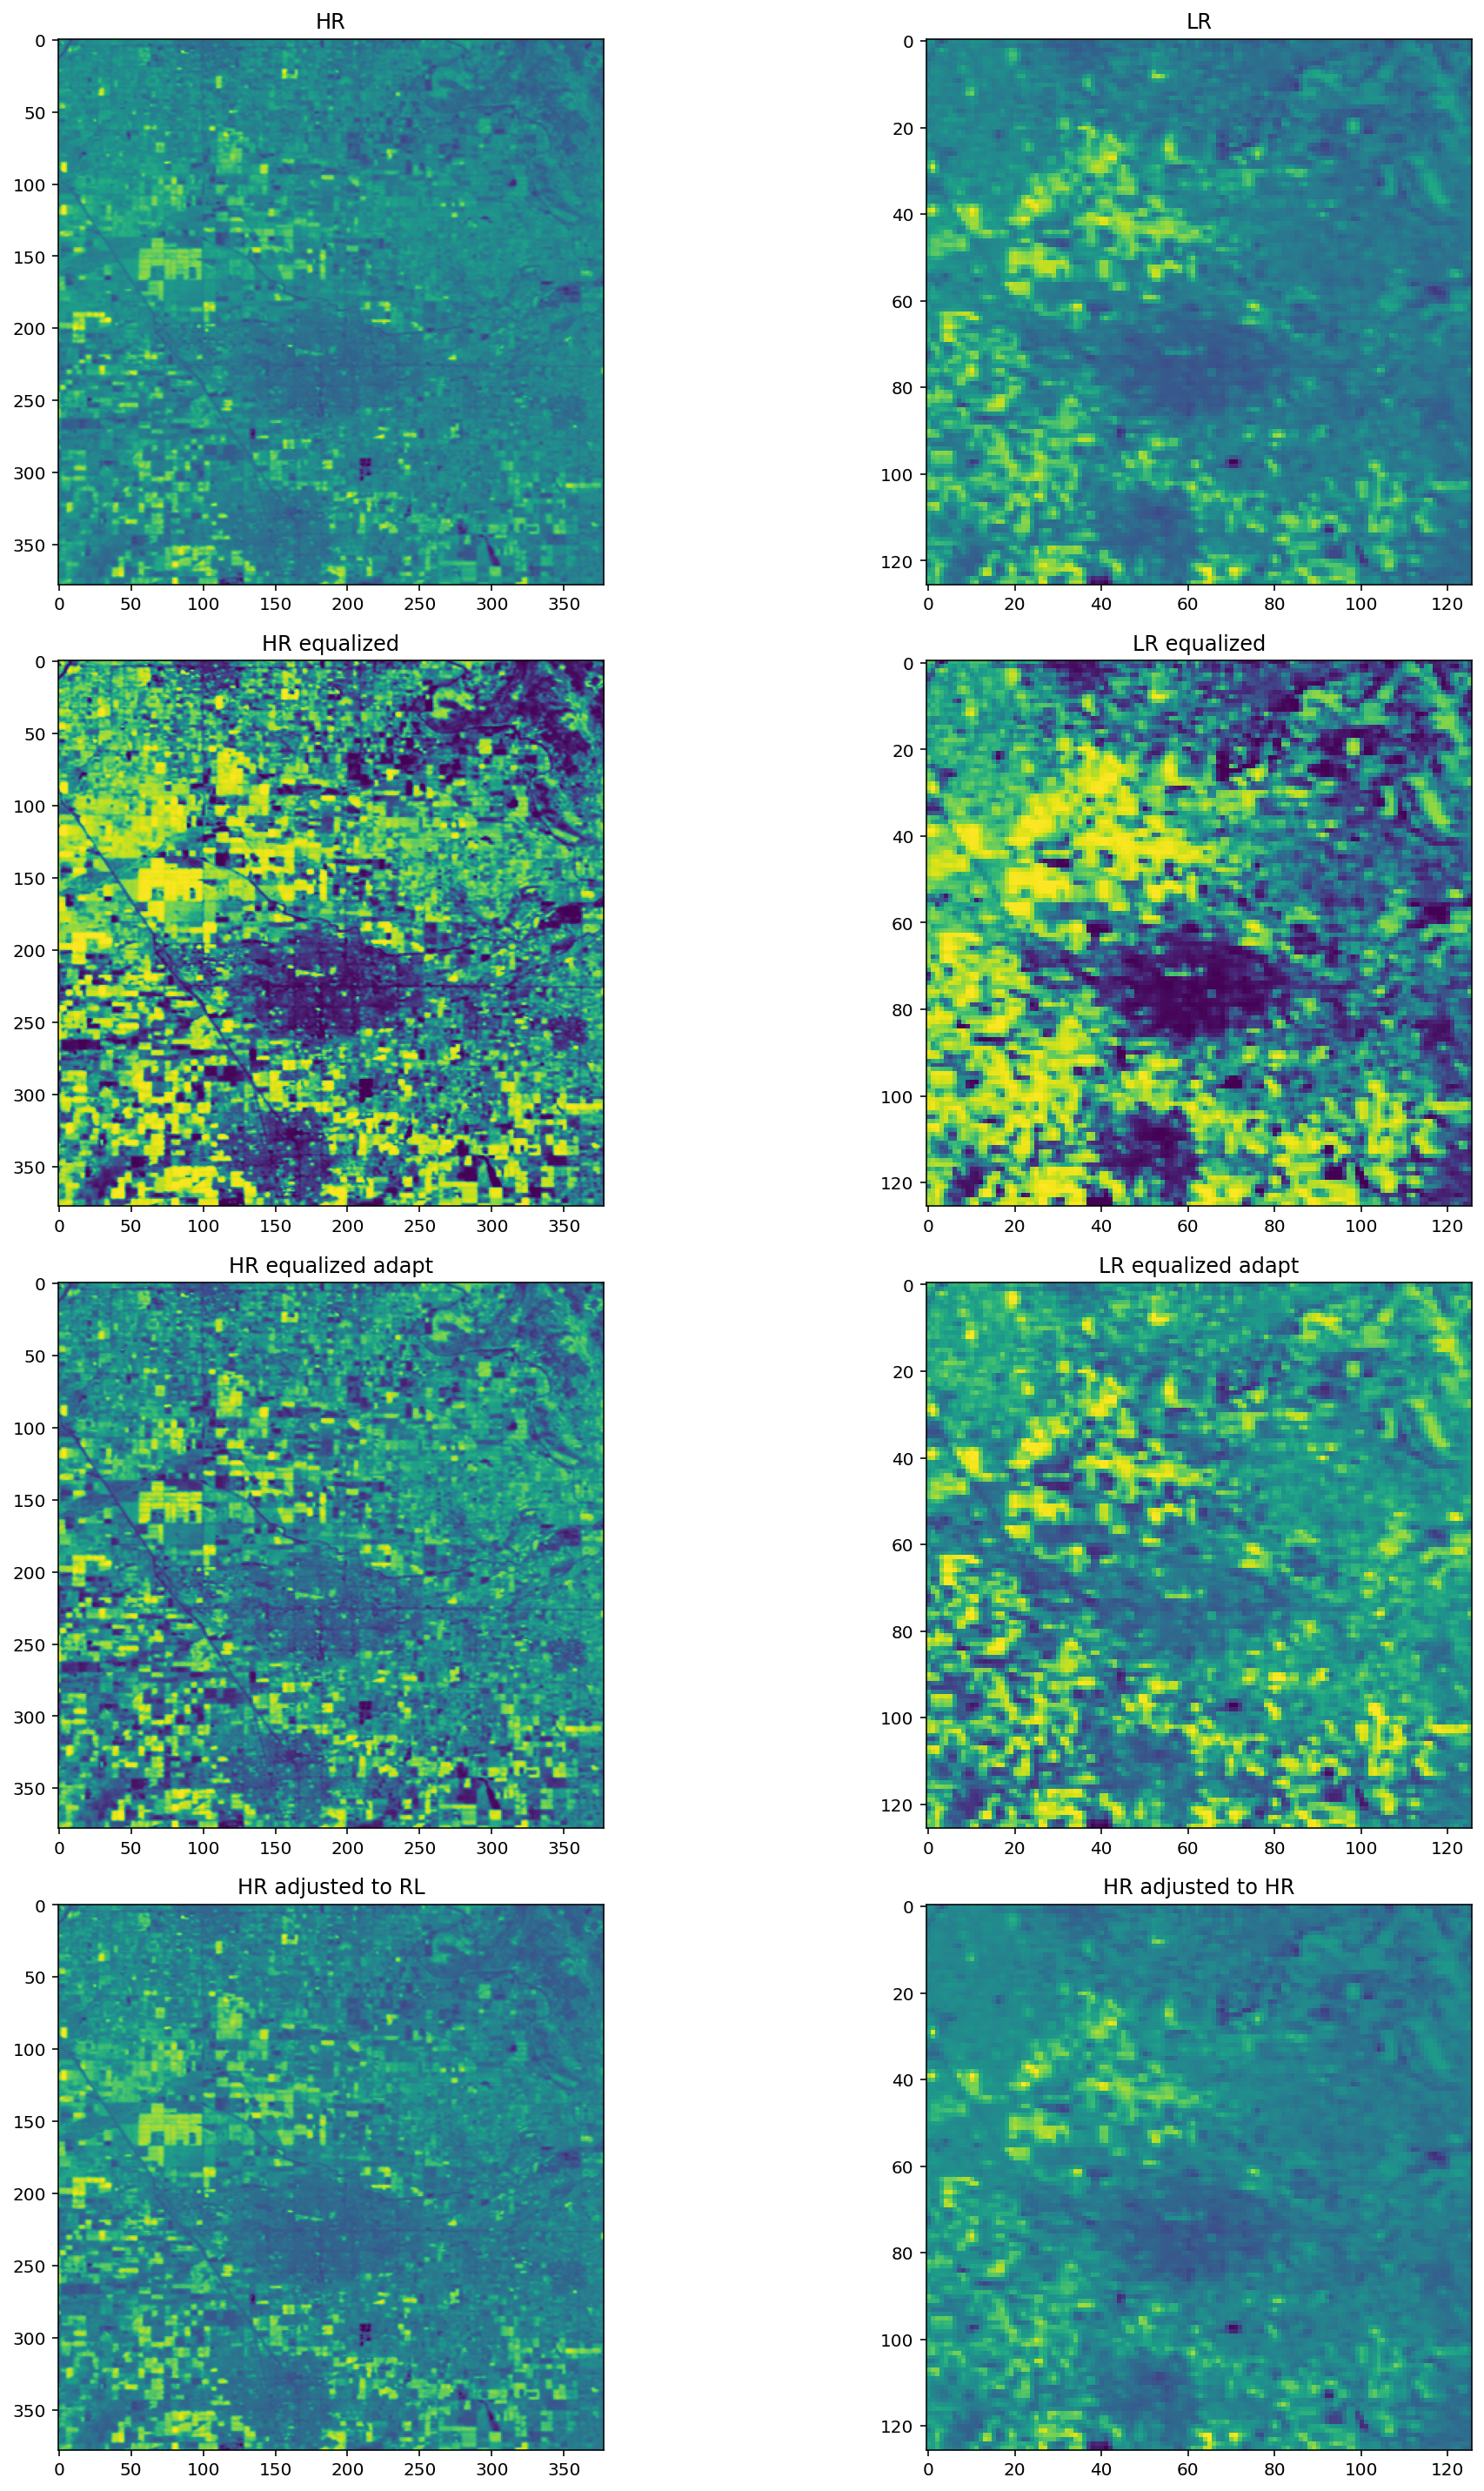

In [8]:
plt.figure(figsize=(16, 20))
plt.subplot(4, 2, 1)
plt.title('HR')
plt.imshow(hr)
plt.subplot(4, 2, 2)
plt.title('LR')
plt.imshow(lr)
plt.subplot(4, 2, 3)
plt.title('HR equalized')
plt.imshow(hr_eq)
plt.subplot(4, 2, 4)
plt.title('LR equalized')
plt.imshow(lr_eq)
plt.subplot(4, 2, 5)
plt.title('HR equalized adapt')
plt.imshow(hr_adapt_eq)
plt.subplot(4, 2, 6)
plt.title('LR equalized adapt')
plt.imshow(lr_adapt_eq)
plt.subplot(4, 2, 7)
plt.title('HR adjusted to RL')
plt.imshow(hr_adj_lr)
plt.subplot(4, 2, 8)
plt.title('HR adjusted to HR')
plt.imshow(lr_adj_hr)
plt.tight_layout()
plt.show()